# Load libraries

In [1]:
import numpy as np
import foamTools as ft
import matplotlib.pyplot as plt
%matplotlib inline

# Load cell positions from OpenFOAM ccx, ccy, ccz (generated from OpenFOAM function writeCellCentres) 

In [2]:
ccx = ft.loadScalar('example-files/ccx')
ccy = ft.loadScalar('example-files/ccy')

# Initilzed the velocity and pressire field with Lamb-Oseen vortex (2D)

In [3]:
def lambOseenVelocity(G, Rc, x0, y0, x, y):
    '''
    Calculate the velocity field of a Lamb-Oseen vortex
        G  - circulation
        Rc - vortex core radius
        x0 - vortex core x location
        y0 - vortex core y location
        x  - x field point
        y  - y field point
        u  - x component velocity field
        v  - y component velocity field
    '''
    
    # Convert cartesian coordinate position
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    t = np.arctan2((x-x0), (y-y0))
    
    # Tangential velocity
    uT = G/(2*np.pi*r)*(1-np.exp(-(r/Rc)**2))
    
    # Cartiesian velocity components
    u = -uT*np.cos(t)
    v =  uT*np.sin(t)
    
    return u, v

def lambOseenEnstrophy(G, Rc, x0, y0, x, y):
    '''
    Calculate the velocity field of a Lamb-Oseen vortex
    G   - circulation
    Rc  - vortex core radius
    x0  - vortex core x location
    y0  - vortex core y location
    x   - x field point
    y   - y field point
    ens - enstrophy
    '''
    # Convert cartesian coordinate position
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    t = np.arctan2((x-x0), (y-y0))
    
    # Vorticity field
    ww = G/(np.pi*Rc**2) * np.exp(-r**2/Rc**2)
    
    # Enstrophy field
    ens = 0.5*ww**2
    
    return ens

In [4]:
G  = 10.0
Rc =  0.2
x0 =  0.0
y0 =  0.0

uu, vv = lambOseenVelocity(G, Rc, x0, y0, ccx, ccy)
ens = lambOseenEnstrophy(G, Rc, x0, y0, ccx, ccy)
ww = np.zeros(uu.shape) # 2D field no z component velocity

# Write vector field "velocity" into OpenFOAM file "U" with template "U-template"

In [5]:
ft.writeVector('example-files/U', 'example-files/U-template', uu, vv, ww)

# Write scalar field "enstrophy" into OpenFOAM file "enstrophy" with template "enstrophy-template"

In [6]:
ft.writeScalar('example-files/enstrophy', 'example-files/enstrophy-template', ens)

# Load OpenFOAM vector field and plot its magnitude with matplotlib

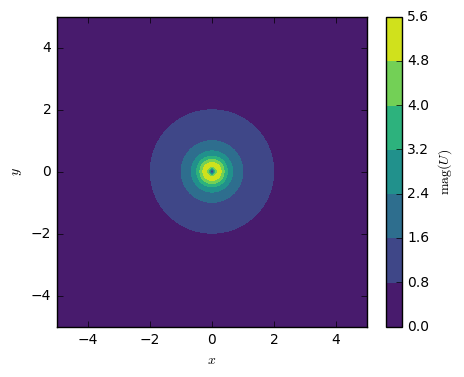

In [7]:
vel = ft.loadVector('example-files/U')

magVel = np.sum(vel**2, axis=1)**0.5

plt.figure(figsize=(4*1.25,4))
plt.tricontourf(ccx, ccy, magVel, cmap='viridis')
plt.colorbar(label='$\mathrm{mag}(U)$')
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.xlabel('$x$')
plt.ylabel('$y$');